In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(train_ds, val_ds), info = tfds.load('cifar10',
 split=['train[:80%]', 'train[80%:]'],
 with_info=True,
 as_supervised=True)

Visualizing images from the training dataset:


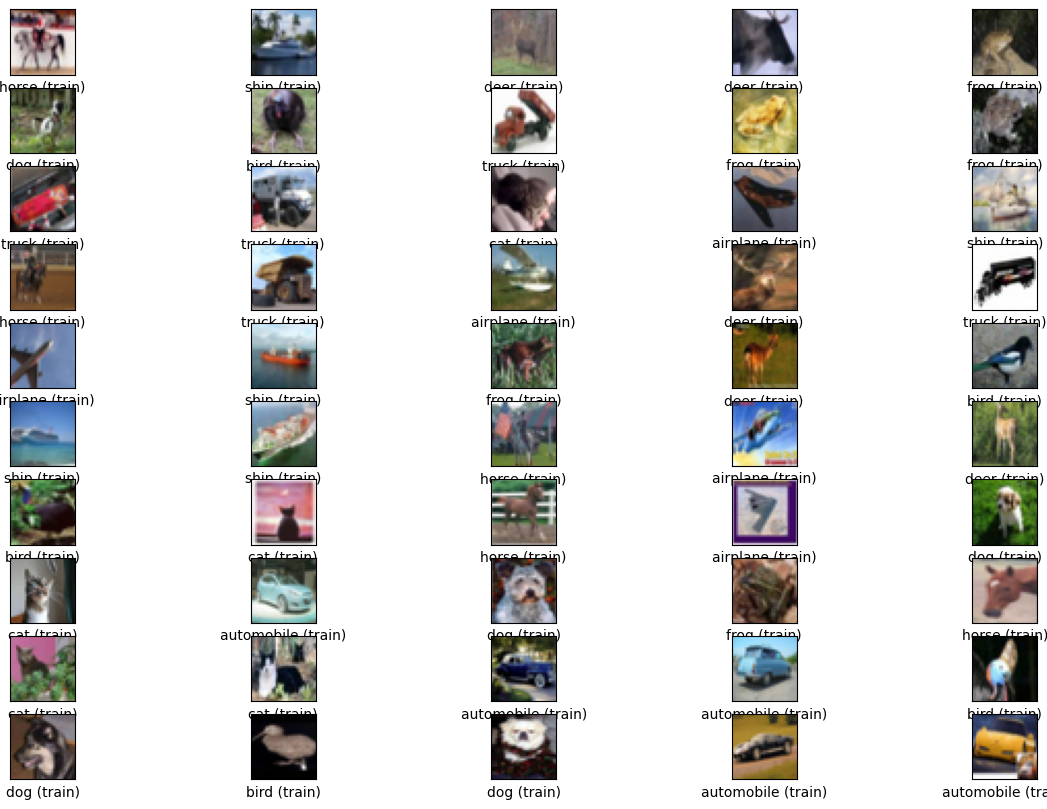

Visualizing images from the test dataset:


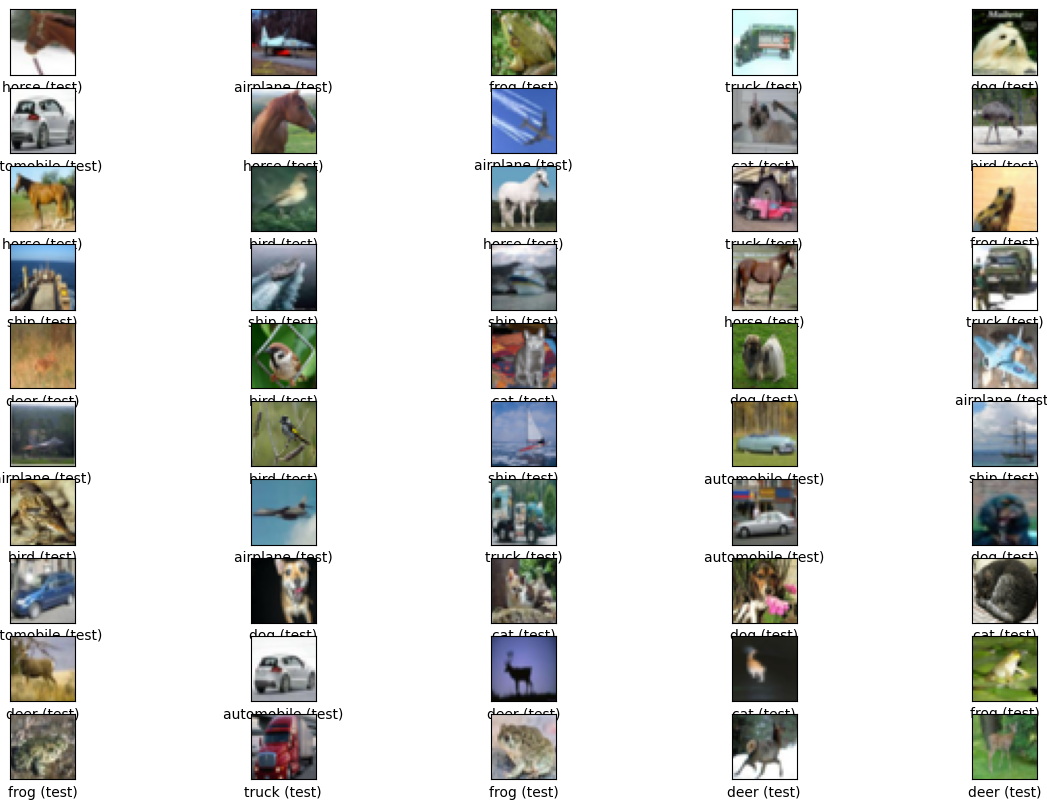

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
(train_ds, test_ds), info = tfds.load('cifar10', split=['train', 'test'], with_info=True,
as_supervised=True)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def display_images(dataset, dataset_type, num_images_per_class=5):
 plt.figure(figsize=(15, 10))
 class_count = {class_name: 0 for class_name in class_names}
 images_displayed = 0
 for image, label in dataset:
  label_index = label.numpy()
  class_name = class_names[label_index]
  if class_count[class_name] < num_images_per_class:
   plt.subplot(len(class_names), num_images_per_class, images_displayed + 1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(image.numpy())
   plt.xlabel(f'{class_name} ({dataset_type})')
   class_count[class_name] += 1
   images_displayed += 1
  if images_displayed >= len(class_names) * num_images_per_class:
   break # Moved break inside the loop
 plt.show() # Display all images
# Visualize images from the training set
print("Visualizing images from the training dataset:")
display_images(train_ds, dataset_type='train')
# Visualize images from the test set
print("Visualizing images from the test dataset:")
display_images(test_ds, dataset_type='test')

In [5]:
# Define a Sequential model for data augmentation to enhance the dataset
data_augmentation = tf.keras.Sequential([
 # Randomly flip the image both horizontally and vertically
 layers.RandomFlip("horizontal_and_vertical"),

 # Randomly rotate the image by up to 20% (0.2)
 layers.RandomRotation(0.2),

 # Randomly zoom the image by up to 10% (0.1)
 layers.RandomZoom(0.1), # Add random zoom

 layers.RandomContrast(0.2)
])
def preprocess_data(image, label):
 image = tf.image.resize(image, [32, 32])
 image = data_augmentation(image)
 image /= 255.0

 return image, label

In [6]:
batch_size = 64
train_ds = train_ds.map(preprocess_data).shuffle(1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_data).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
model = models.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
 layers.BatchNormalization(),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Flatten(),
 layers.Dense(512, activation='relu'),
 layers.Dropout(0.5),
 layers.Dense(10, activation='softmax')
])

c:\Users\IICET 22\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=["accuracy"])

In [ ]:
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=40
)

Epoch 1/40


In [ ]:
# Save the trained model to a file for later use, so you can load it without retraining.
# model.save('cifar10_model.h5')
import pickel
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)



ModuleNotFoundError: No module named 'pickel'

In [ ]:
# Evaluate the trained model on the validation dataset to assess its performance.
loss, accuracy = model.evaluate(val_ds)
# Print the validation accuracy to see how well the model performs on unseen data.
print(f'Validation accuracy: {accuracy:.2f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6343 - loss: 1.0342
Validation accuracy: 0.64


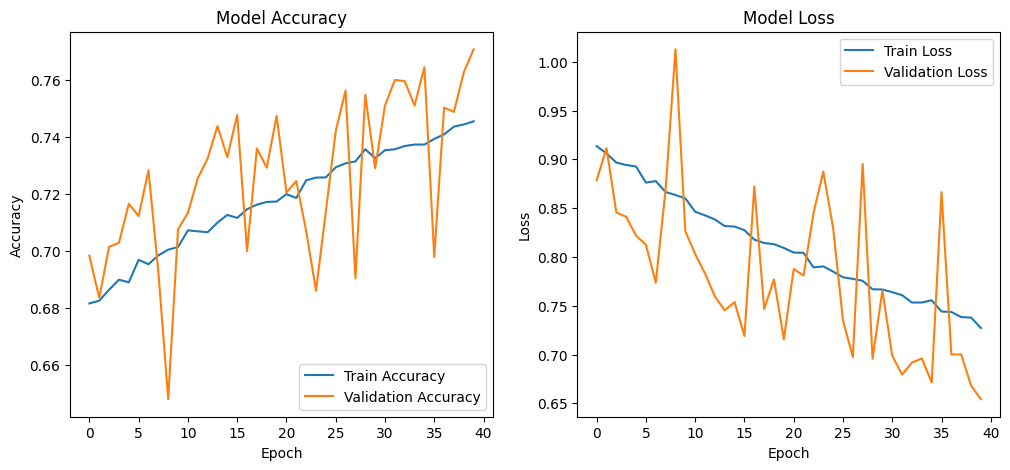

In [ ]:
# Define a function to plot the training and validation accuracy and loss over the epochs
def plot_history(history):
 # Create a figure for the plots with a size of 12x5 inches
 plt.figure(figsize=(12, 5))

 # Subplot for accuracy
 plt.subplot(1, 2, 1)
 # Plot training accuracy
 plt.plot(history.history['accuracy'], label='Train Accuracy')
 # Plot validation accuracy
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 # Title for the accuracy plot
 plt.title('Model Accuracy')
 # Label for the y-axis
 plt.ylabel('Accuracy')
 # Label for the x-axis (epochs)
 plt.xlabel('Epoch')
 # Display the legend at the lower right corner
 plt.legend(loc='lower right')
 # Subplot for loss
 plt.subplot(1, 2, 2)
 # Plot training loss
 plt.plot(history.history['loss'], label='Train Loss')
 # Plot validation loss
 plt.plot(history.history['val_loss'], label='Validation Loss')
 # Title for the loss plot
 plt.title('Model Loss')
 # Label for the y-axis
 plt.ylabel('Loss')
 # Label for the x-axis (epochs)
 plt.xlabel('Epoch')
 # Display the legend at the upper right corner
 plt.legend(loc='upper right')
 # Show the plots
 plt.show()
# Call the function to plot the training history
plot_history(history)

In [7]:
import numpy as np
l=[12.23,13.32,100,36.32]
print("Orignal list:",l)
a=np.array(l)

print("one-dimenstional numpy array:",a)

Orignal list: [12.23, 13.32, 100, 36.32]
one-dimenstional numpy array: [ 12.23  13.32 100.    36.32]


In [8]:
# write a numpy program to create a 3*3 matrix with value ranging from 2 to 10 

import numpy as np
x= np.arange(2,11).reshape(3,3)
print(x)

[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [9]:
# numpy program to add , sub,multiply,divide aeguments element wise


import numpy as np
print(np.add(1.0,4.0))


5.0
